# Kollokasjoner for nøkkelord

In [1]:
import dhlab.nbtext as nb
import dhlab.module_update as mu
import dhlab.graph_networkx_louvain as gnl
from dhlab.module_update import update, css, code_toggle

In [2]:
css()

In [3]:
def categorize(list_of_words):
    proprium = [x for x in list_of_words if x[0].upper() == x[0]]
    other = [x for x in list_of_words if not x in proprium]

    return {'propr':proprium,
           'other': other }

def select_form(w):
    fs = [x.split()[0] for x in nb.word_form(w)]
    if 'verb' in fs:
        res = 'verb'
    elif 'subst' in fs:
        res = 'subst'
    elif len(fs) > 0:
        res = fs[0]
    else:
        res = 'unknown'
    return res

def sort_word_forms(words):
    res = {select_form(w):w for w in words}
    return res

def character_words(Character_name, number_of_words=50):
    res = {w:select_form(w) for w in categorize(list(nb.frame_sort(nb.frame(coll_matrix[Character_name]/tot['tot'], 'association')).head(number_of_words).index))['other']}
    result = {cat:[w for w in res if res[w] == cat] for cat in res.values()}
    return result

def mdprint(forskjell, cutoff=5):
    categories = categorize(forskjell[forskjell > cutoff].dropna().index)
    forms = {w:select_form(w) for w in categories['other']}
    Grouping = {cat:[word for word in forms if forms[word] == cat] for cat in forms.values()}
    navn = "## Benevnelser \n"
    navn += "<span style='font-size:150%'>{stuff}</span>".format(stuff= ', '.join(categories['propr']))
    pos = ""
    for cat in Grouping:
        pos += "## " + cat + "\n"
        pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(Grouping[cat]) ) + "\n"
    mu.printmd(navn)
    mu.printmd(pos)
    return

In [4]:
import pandas as pd

In [5]:
import ast

In [6]:
#colls_before = pd.read_json('demokrati_before.json')

In [7]:
import warnings
warnings.filterwarnings('ignore')

In [8]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 20})

In [9]:
cliques = lambda G: [list(x) for  x in list(gnl.make_cliques_from_graph(G.to_undirected())[1].values())]
    

## Definer nøkkelordet

noteboken blir kjørt flere ganger, en notebook for hvert nøkkelord, *influensa*, *helse*

In [10]:
reference = nb.frame(nb.totals(50000), 'tot')

In [11]:
keyword = 'abort'

In [12]:
filename = 'collocation_' + keyword + ".csv"

## Grafstruktur topos

In [13]:
keyword_graph = nb.make_graph(keyword, cutoff=16)

In [14]:
comm = gnl.community_dict(keyword_graph)

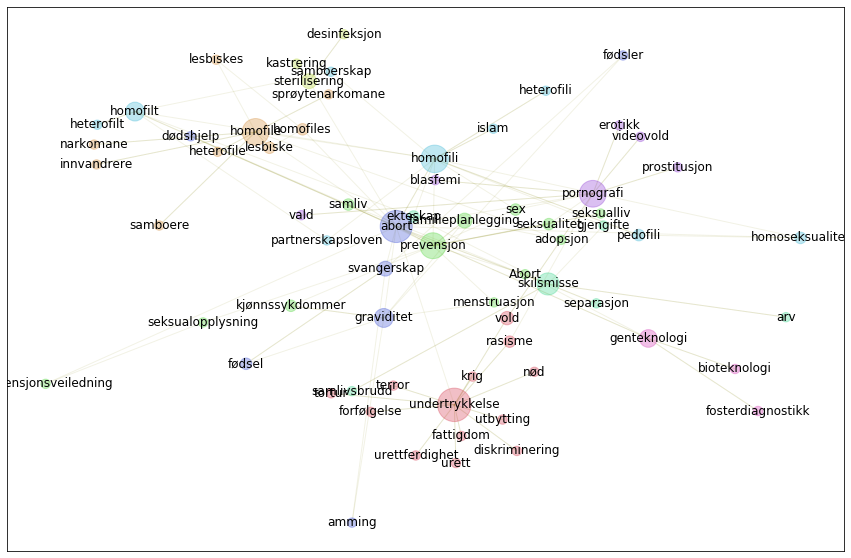

In [15]:
gnl.show_graph(keyword_graph, spread=1.2, fontsize=12)

# Topoi fra grafen

Der klikkstrukturen kombinerer færre element, er alle nodene i grafen med og definerer et topos.

In [16]:
pos=""
for x in comm:
    pos += "### " + x + "\n"
    pos += "<span style='font-size:1.1em'>{stuff}</span>".format(stuff= ', '.join(comm[x]) ) + "\n"
mu.printmd(pos)

### sterilisering-desinfeksjon
<span style='font-size:1.1em'>sterilisering, desinfeksjon, kastrering</span>
### abort-prevensjon
<span style='font-size:1.1em'>abort, prevensjon, familieplanlegging, seksualitet, sex, kjønnssykdommer, samliv, adopsjon, seksualliv, Abort, dødshjelp, seksualopplysning, menstruasjon, prevensjonsveiledning</span>
### skilsmisse-ekteskap
<span style='font-size:1.1em'>skilsmisse, ekteskap, separasjon, samlivsbrudd, gjengifte, arv</span>
### homofili-homofilt
<span style='font-size:1.1em'>homofili, homofilt, homoseksualitet, pedofili, samboerskap, heterofili, partnerskapsloven, heterofilt, islam</span>
### graviditet-svangerskap
<span style='font-size:1.1em'>graviditet, svangerskap, fødsel, fødsler, amming</span>
### pornografi-blasfemi
<span style='font-size:1.1em'>pornografi, blasfemi, prostitusjon, vald, videovold, erotikk</span>
### genteknologi-bioteknologi
<span style='font-size:1.1em'>genteknologi, bioteknologi, fosterdiagnostikk</span>
### undertrykkelse-vold
<span style='font-size:1.1em'>undertrykkelse, vold, rasisme, terror, nød, forfølgelse, tortur, utbytting, diskriminering, krig, urett, urettferdighet, fattigdom</span>
### homofile-lesbiske
<span style='font-size:1.1em'>homofile, lesbiske, homofiles, innvandrere, lesbiskes, sprøytenarkomane, samboere, narkomane, heterofile</span>


In [17]:
gnl.show_cliques(keyword_graph)

(3, 1) homofile, homoseksualitet, samboerskap, prevensjon, abort, homofilt, pedofili, graviditet, partnerskapsloven, sex, familieplanlegging, ekteskap, homofili



# Assosiasjoner fra kollokasjonene

<span style="font-size:150%">nb.collocation(keyword, yearfrom=1950, yearto=2000, before=10, after=10, corpus='avis')</span>


In [18]:
barchart = lambda word, df: df.loc[word].plot(kind='bar', rot=0, figsize=(10,5),title=word);

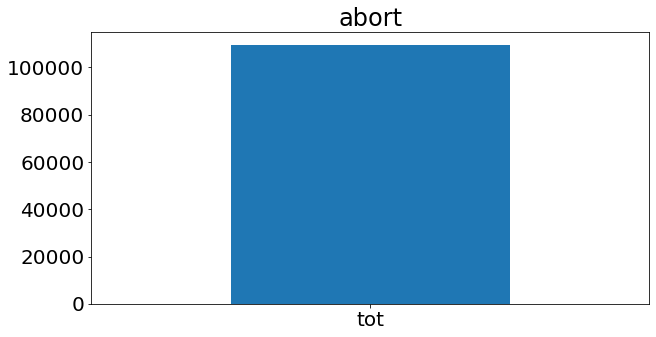

In [19]:
barchart(keyword, reference);

In [20]:
from time import time

collocations = dict()
step = 1

for i in range(1950, 2000):
    print(i)
    t0 = time()
    try:
        collocations[i] = nb.collocation(keyword, yearfrom = i, yearto = i + step, before = 10, after = 10, corpus = 'bok')
    except:
        try:
            collocations[i] = nb.collocation(keyword, yearfrom= i, yearto= i + step, before = 10, after = 10, corpus = 'bok')
        except:
            print("gir opp", i)
    print((time() - t0)/60, "minutter")

1950
0.03694960276285807 minutter
1951
0.013148160775502522 minutter
1952
0.022252221902211506 minutter
1953
0.015643751621246337 minutter
1954
0.012415138880411784 minutter
1955
0.009648454189300538 minutter
1956
0.010441323121388754 minutter
1957
0.016752541065216064 minutter
1958
0.018819963932037352 minutter
1959
0.019959243138631184 minutter
1960
0.012028221289316814 minutter
1961
0.02865134080251058 minutter
1962
0.014502131938934326 minutter
1963
0.015588776270548502 minutter
1964
0.01887441078821818 minutter
1965
0.021139327685038248 minutter
1966
0.023140100638071696 minutter
1967
0.021875472863515218 minutter
1968
0.016831517219543457 minutter
1969
0.023870070775349934 minutter
1970
0.024618732929229736 minutter
1971
0.03521878719329834 minutter
1972
0.027236199378967284 minutter
1973
0.030930089950561523 minutter
1974
0.0345250407854716 minutter
1975
0.030553293228149415 minutter
1976
0.03697428305943807 minutter
1977
0.054527751604715985 minutter
1978
0.04225176175435384 mi

In [21]:
colls = nb.frame(collocations)

In [22]:
colls = pd.concat([nb.frame(collocations[i], i) for i in collocations], axis=1).fillna(0)

In [23]:
def group_frames(df, bins=10, mode='rel'):
    agg = pd.DataFrame()
    step = 10
    for i in range(0, len(df.columns), step):
        agg[df.columns[i]] = df[df.columns[i:i+step]].sum(axis=1)
    return agg

In [24]:
agg = group_frames(colls)

In [25]:
nb.normalize_corpus_dataframe(agg)

True


# Opptelling

# Sammenligner med en referanse


In [26]:
reference.sort_values(by=reference.columns[0], ascending=False)[:10].style.background_gradient()

,tot
.,1265723110
",",1105303412
og,543432056
i,460246057
det,273411583
som,265144740
til,254500136
er,248764786
av,235180661
en,231631623


In [27]:
agg.sort_values(by=agg.columns[2], ascending=False)[:10].style.background_gradient()

,1950,1960,1970,1980,1990
.,0.0568361,0.0528379,0.0512322,0.0515911,0.0474375
",",0.0473533,0.0433635,0.0396902,0.03867,0.041294
og,0.018542,0.0188715,0.0216119,0.021767,0.0233673
i,0.0166213,0.0139024,0.0187794,0.0184942,0.0176971
er,0.0163037,0.0168728,0.0167971,0.0143421,0.01376
en,0.0217635,0.0201966,0.0156697,0.014467,0.0130327
til,0.0145644,0.0143551,0.0150827,0.0152502,0.0153982
som,0.0146249,0.013284,0.0148381,0.0147372,0.0147287
det,0.0146703,0.0136926,0.0140671,0.0131762,0.012809
av,0.0150333,0.0130521,0.0134847,0.0131831,0.0133215


In [28]:
pmi = pd.DataFrame()
for i in agg:
    pmi[i] = agg[i]**1.02/(pd.concat([agg[i], reference['tot']],axis=1).mean(axis=1))

In [29]:
nb.normalize_corpus_dataframe(pmi)

True

In [ ]:
pmi.to_csv(filename)

In [16]:
pmi = pd.read_csv(filename, index_col=0)

In [17]:
pmi

,1950,1960,1970,1980,1990
Detspille,0.000000e+00,0.0,0.000000e+00,5.378044e-05,3.195610e-05
Katarina,0.000000e+00,0.0,8.182398e-05,0.000000e+00,0.000000e+00
Lovproposisjon,0.000000e+00,0.0,8.182398e-05,0.000000e+00,0.000000e+00
omstendighet,0.000000e+00,0.0,8.069749e-05,5.230981e-05,0.000000e+00
opprinnelige,0.000000e+00,0.0,8.182398e-05,0.000000e+00,0.000000e+00
...,...,...,...,...,...
◄,0.000000e+00,0.0,0.000000e+00,5.304003e-05,0.000000e+00
★,0.000000e+00,0.0,2.929450e-14,0.000000e+00,0.000000e+00
♦,0.000000e+00,0.0,7.593358e-16,8.888536e-16,5.775011e-15
✓,3.591852e-13,0.0,0.000000e+00,0.000000e+00,7.250036e-16


<br>
<br>
<br>
<br>


# De 15 beste for passende kolonne

In [18]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(25).fillna(0).style.background_gradient(axis=0)

,1950,1960,1970,1980,1990
Abortus,0.00041308,0.000275647,8.90805e-05,5.85415e-05,3.40093e-05
habituell,0.000412818,0.000269287,8.85525e-05,5.79055e-05,3.52369e-05
provocatus,0.000408046,0.000270135,8.92035e-05,5.83648e-05,3.52732e-05
framkalt,0.000407888,0.000269621,8.83736e-05,5.92656e-05,3.52396e-05
framkalle,0.000407393,0.000266318,8.82771e-05,5.7345e-05,3.4775e-05
abortus,0.000406685,0.000271284,8.98894e-05,5.90182e-05,3.60447e-05
aborter,0.000406111,0.00027087,9.04183e-05,5.91495e-05,3.5718e-05
Habituell,0.000405056,0.00026688,8.78288e-05,5.7466e-05,3.46535e-05
abortere,0.000403308,0.000268553,8.75243e-05,5.71294e-05,3.508e-05
Abort,0.000403308,0.000269512,9.02849e-05,5.89953e-05,3.60713e-05


In [19]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(25).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
Abortus,0.00041308,0.000275647,8.90805e-05,5.85415e-05,3.40093e-05
abortus,0.000406685,0.000271284,8.98894e-05,5.90182e-05,3.60447e-05
aborter,0.000406111,0.00027087,9.04183e-05,5.91495e-05,3.5718e-05
provocatus,0.000408046,0.000270135,8.92035e-05,5.83648e-05,3.52732e-05
framkalt,0.000407888,0.000269621,8.83736e-05,5.92656e-05,3.52396e-05
Abort,0.000403308,0.000269512,9.02849e-05,5.89953e-05,3.60713e-05
habituell,0.000412818,0.000269287,8.85525e-05,5.79055e-05,3.52369e-05
svangerskapsavbrytelse,0.000395564,0.000269171,8.79754e-05,5.6981e-05,3.48241e-05
abortere,0.000403308,0.000268553,8.75243e-05,5.71294e-05,3.508e-05
Truende,0.000401086,0.000267549,8.79518e-05,5.79479e-05,3.56551e-05


In [20]:
pmi.sort_values(by=pmi.columns[2], ascending=False).head(25).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
selvbestemt,0,0,9.38796e-05,6.17192e-05,3.74409e-05
aborter,0.000406111,0.00027087,9.04183e-05,5.91495e-05,3.5718e-05
Abort,0.000403308,0.000269512,9.02849e-05,5.89953e-05,3.60713e-05
sjølbestemt,0,0,9.01833e-05,5.81803e-05,3.49921e-05
Selvbestemt,0,0.00025281,8.99298e-05,5.8788e-05,3.55121e-05
abortus,0.000406685,0.000271284,8.98894e-05,5.90182e-05,3.60447e-05
Provosert,0.000396253,0.000257486,8.9448e-05,5.82944e-05,3.57758e-05
Spontan,0.000401443,0.000266318,8.93628e-05,5.85074e-05,3.55545e-05
sterilisering,0.000387642,0.000265909,8.92271e-05,5.78158e-05,3.56089e-05
provocatus,0.000408046,0.000270135,8.92035e-05,5.83648e-05,3.52732e-05


In [21]:
pmi.sort_values(by=pmi.columns[3], ascending=False).head(25).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
selvbestemt,0,0,9.38796e-05,6.17192e-05,3.74409e-05
framkalt,0.000407888,0.000269621,8.83736e-05,5.92656e-05,3.52396e-05
aborter,0.000406111,0.00027087,9.04183e-05,5.91495e-05,3.5718e-05
abortus,0.000406685,0.000271284,8.98894e-05,5.90182e-05,3.60447e-05
Abort,0.000403308,0.000269512,9.02849e-05,5.89953e-05,3.60713e-05
Selvbestemt,0,0.00025281,8.99298e-05,5.8788e-05,3.55121e-05
sjølvbestemt,0,0,8.82968e-05,5.8673e-05,3.59394e-05
svangerskapsuke,0.000402732,0.00026108,8.81959e-05,5.86386e-05,3.60646e-05
Abortus,0.00041308,0.000275647,8.90805e-05,5.85415e-05,3.40093e-05
Spontan,0.000401443,0.000266318,8.93628e-05,5.85074e-05,3.55545e-05


In [34]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(25).fillna(0).style.background_gradient(axis=1)

,1950,1960,1970,1980,1990
selvbestemt,0,0,9.38796e-05,6.17192e-05,3.74409e-05
Abort,0.000403308,0.000269512,9.02849e-05,5.89953e-05,3.60713e-05
svangerskapsuke,0.000402732,0.00026108,8.81959e-05,5.86386e-05,3.60646e-05
abortus,0.000406685,0.000271284,8.98894e-05,5.90182e-05,3.60447e-05
sjølvbestemt,0,0,8.82968e-05,5.8673e-05,3.59394e-05
Provosert,0.000396253,0.000257486,8.9448e-05,5.82944e-05,3.57758e-05
svangerskapsavbrudd,0,0.00025281,8.89348e-05,5.83599e-05,3.57355e-05
aborter,0.000406111,0.00027087,9.04183e-05,5.91495e-05,3.5718e-05
Truende,0.000401086,0.000267549,8.79518e-05,5.79479e-05,3.56551e-05
fosterdiagnostikk,0,0,8.24902e-05,5.73566e-05,3.56184e-05


<br>
<br>

In [36]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(50).index

Index(['selvbestemt', 'Abort', 'svangerskapsuke', 'abortus', 'sjølvbestemt',
       'Provosert', 'svangerskapsavbrudd', 'aborter', 'Truende',
       'fosterdiagnostikk', 'sterilisering', 'Spontan', 'abortion',
       'Selvbestemt', 'dødfødsel', 'abortloven', 'Svangerskap', 'AAN',
       'fosterets', 'provocatus', 'framkalt', 'habituell', 'commit',
       'eutanasi', 'dødshjelp', 'sjølvvald', 'pornografi', 'abortere',
       'sjølbestemt', 'Larch', 'abortlov', 'abortinngrep', 'Folkeaksjonen',
       'homofili', 'fosterdød', 'uønskt', 'prevensjonsmidler', 'Forebygging',
       'genteknologi', 'svangerskapets', 'fosterskade', 'innvilges',
       'prenatal', 'eugenisk', 'aborten', 'svangerskapsavbrytelse',
       'spontanabort', 'dsel', 'legalisert', 'framkalle'],
      dtype='object')

In [37]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(50).index

Index(['Abortus', 'habituell', 'provocatus', 'framkalt', 'framkalle',
       'abortus', 'aborter', 'Habituell', 'abortere', 'Abort', 'uterus',
       'aborten', 'svangerskapsuke', 'blødningen', 'svangre', 'sterilitet',
       'Spontan', 'ufruktbarhet', 'Truende', 'påbegynte', 'fodsel',
       'misfoster', 'avbrytelse', 'svangerskapets', 'gonoré', 'egglederen',
       'svanger', 'evacuatio', 'abonnent', 'Kunstig', 'fremkalles',
       'lovstridig', 'abonnere', 'barselfeber', 'Bangs', 'barnemord', 'ABORT',
       'mormunnen', 'abortene', 'fremkalling', 'utstøtes', 'livmorhulen',
       'criminalis', 'utskrapning', 'fosterets', 'spontaneus', 'aborterer',
       'Provosert', 'sengeleie', 'E-vitamin'],
      dtype='object')

In [38]:
pmi.sort_values(by=pmi.columns[1], ascending=False).head(50).index

Index(['Abortus', 'abortus', 'aborter', 'provocatus', 'framkalt', 'Abort',
       'habituell', 'svangerskapsavbrytelse', 'abortere', 'Truende', 'Illegal',
       'Habituell', 'Framkalt', 'aborten', 'fosterfordrivelse', 'Spontan',
       'Kunstig', 'framkalle', 'barnemord', 'Kriminell', 'sterilisering',
       'abortion', 'barselseng', 'sterilisasjon', 'sterilitet', 'abonnent',
       'barselfeber', 'Barselfeber', 'puerperalis', 'Fosteret', 'lovstridig',
       'blodforgiftning', 'febrilis', 'misfoster', 'Fødselskontroll',
       'blødningen', 'Fosterfordrivelse', 'innvilges', 'abonnere',
       'avbrytelse', 'Fremkalt', 'couche', 'incipiens',
       'Svangerskapsavbrytelse', 'aborterer', 'incompletus', 'legalis',
       'ABORT', 'utstøtning', 'pessar'],
      dtype='object')

# Assosiasjoner og variasjon over år.

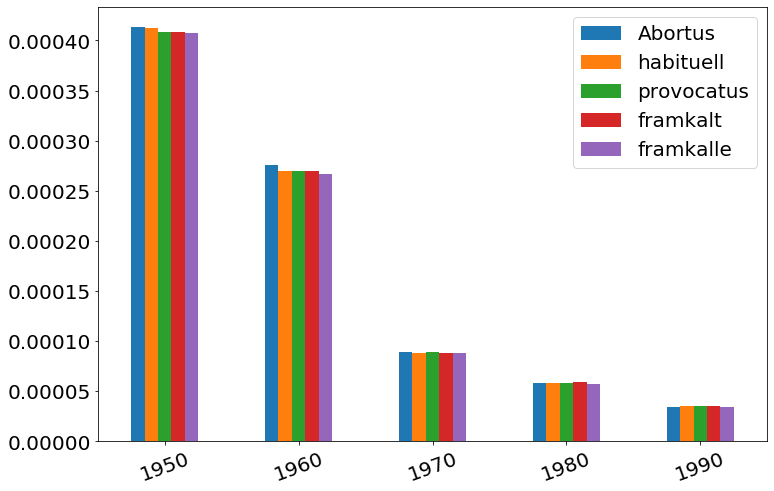

In [39]:
pmi.sort_values(by=pmi.columns[0], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

In [40]:
def freq_assoc_val(agg, pmi, col):
    vals = list(pmi.sort_values(by=pmi.columns[col], ascending=False).head(5).fillna(0).index)
    agg.loc[vals].sort_values(by= agg.columns[col], ascending=False).transpose().plot(kind="bar", rot=0, figsize=(12, 8))

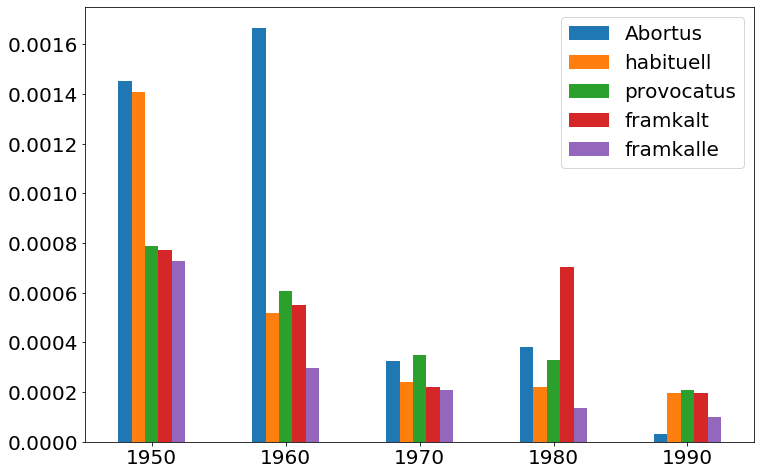

In [41]:
freq_assoc_val(agg, pmi, 0)

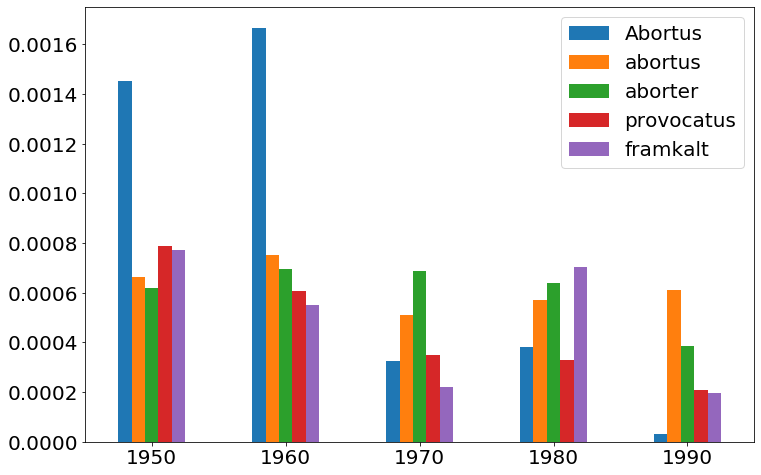

In [42]:
freq_assoc_val(agg, pmi, 1)

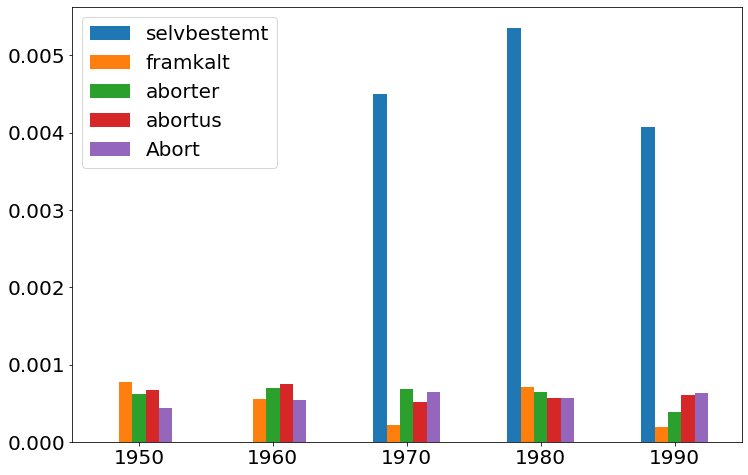

In [43]:
freq_assoc_val(agg, pmi, 3)

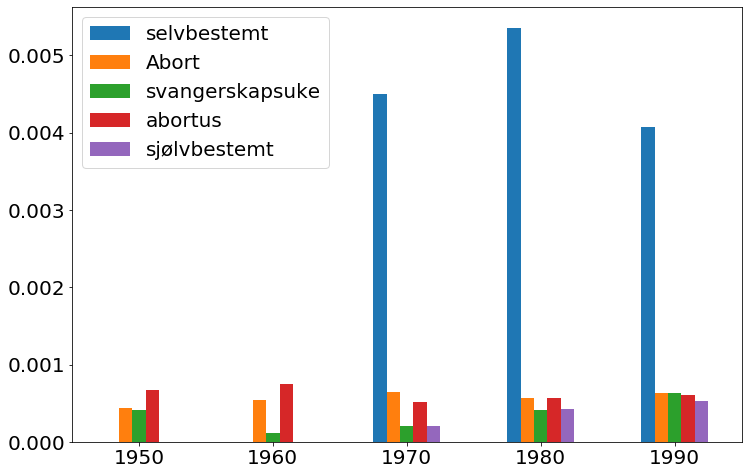

In [44]:
freq_assoc_val(agg, pmi, 4)

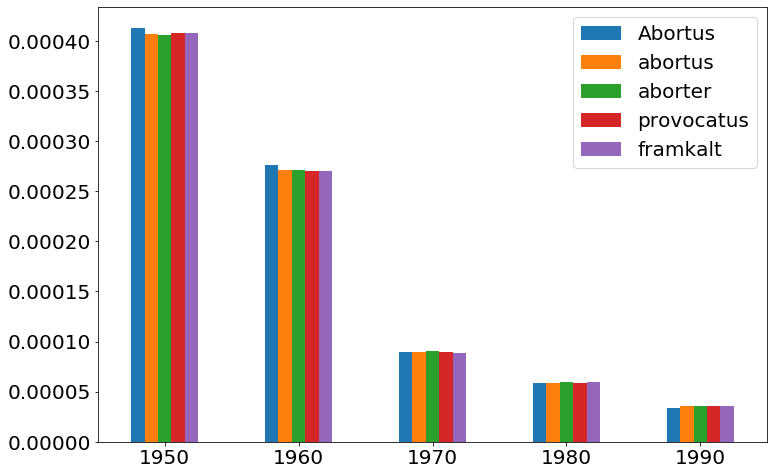

In [45]:
freq_assoc_val(pmi, pmi, 1)

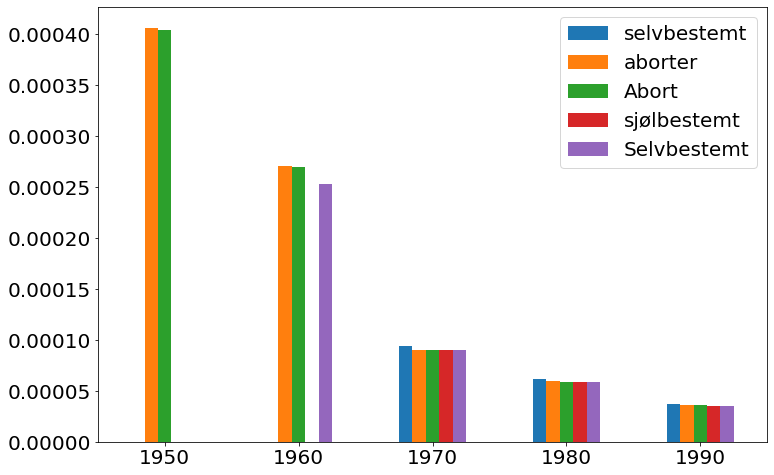

In [46]:
freq_assoc_val(pmi, pmi, 2)

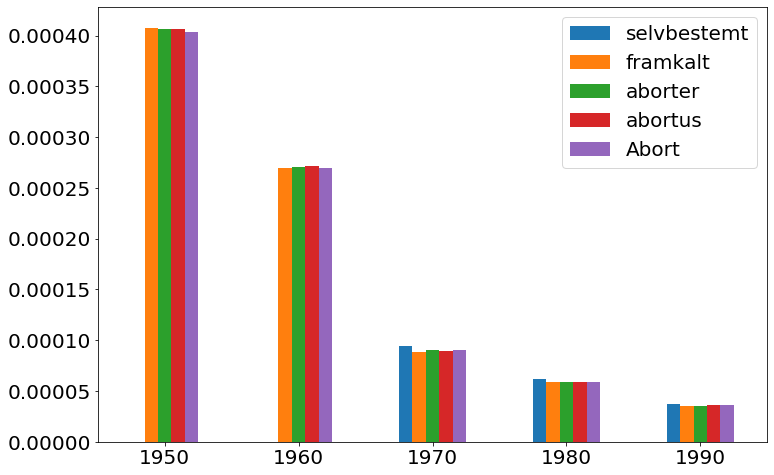

In [47]:
freq_assoc_val(pmi, pmi, 3)

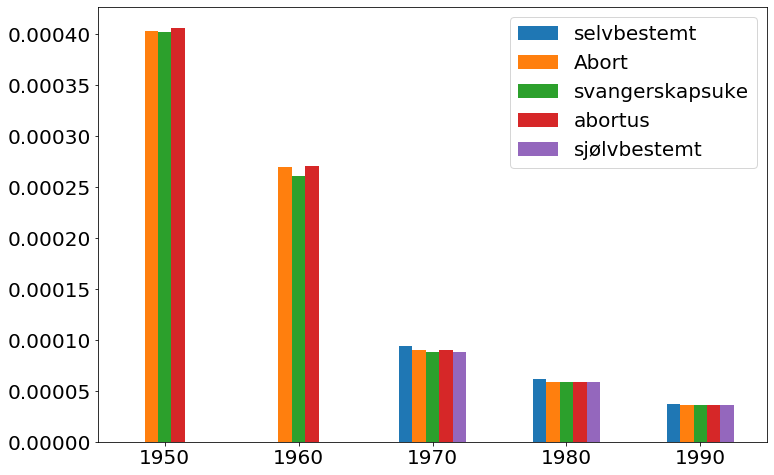

In [48]:
freq_assoc_val(pmi, pmi, 4)

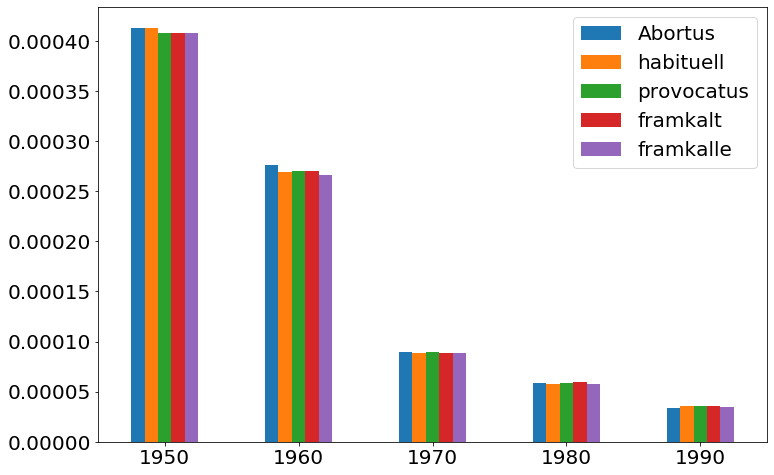

In [49]:
freq_assoc_val(pmi, pmi, 0)

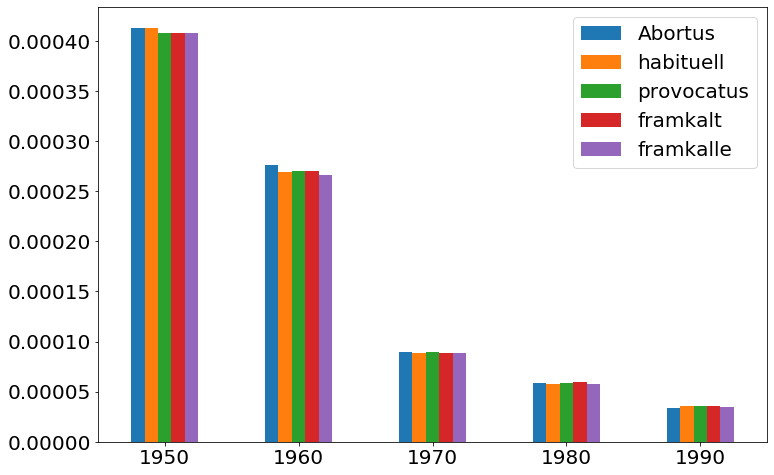

In [50]:
freq_assoc_val(pmi, pmi, 0)

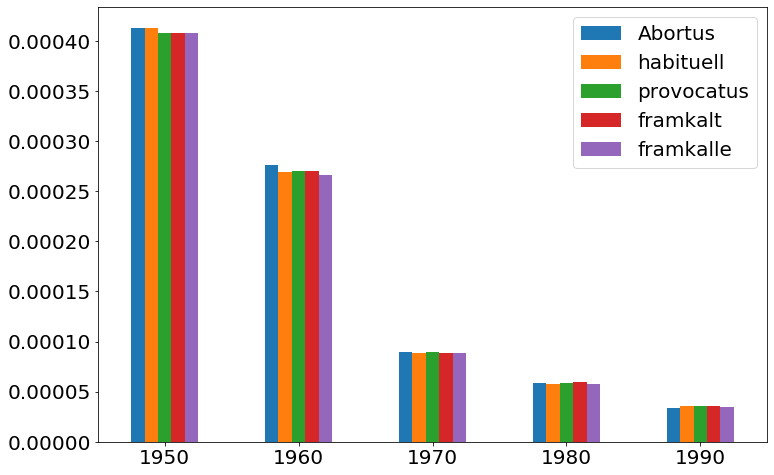

In [51]:
freq_assoc_val(pmi, pmi, 0)

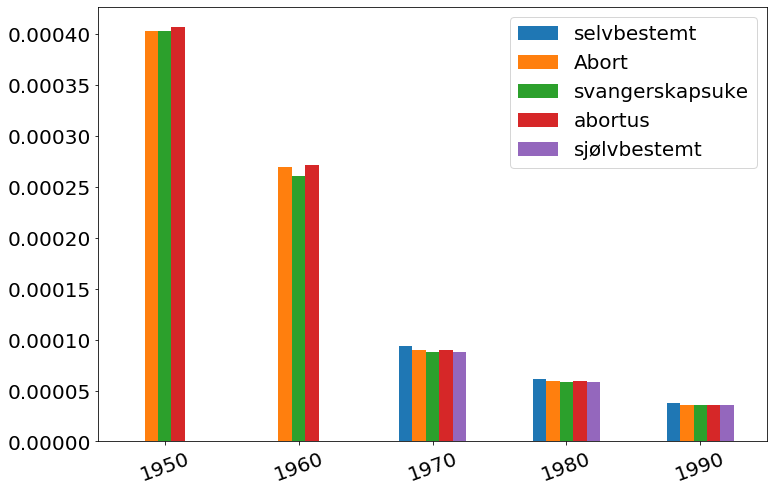

In [52]:
pmi.sort_values(by=pmi.columns[4], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(12, 8));

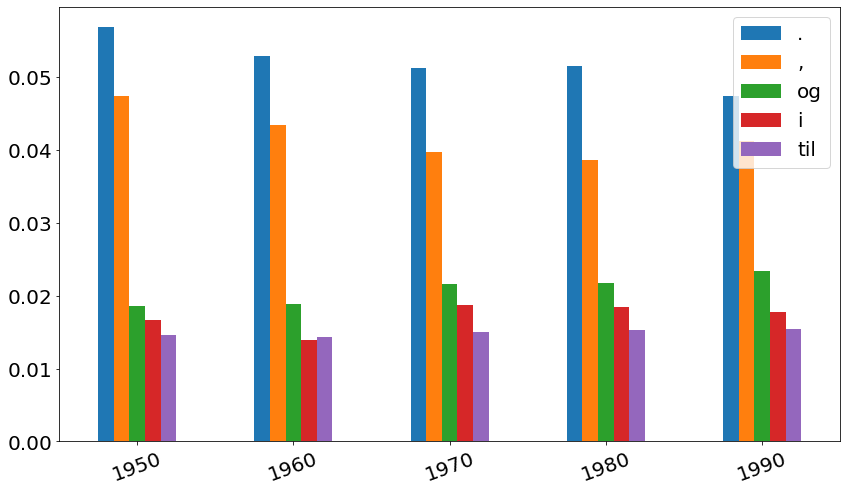

In [53]:
agg.sort_values(by=agg.columns[3], ascending=False).head(5).fillna(0).transpose().plot(kind='bar', rot=20, figsize=(14, 8));

<br>
<br>
<br>
<br>

# De hundre ordene med høyest assosiasjon for perioden sortert på ordklasser

In [54]:
mdprint(pmi.sort_values(by=pmi.columns[2], ascending=False).head(100),-1)

## Benevnelser 
<span style='font-size:150%'>Abort, Selvbestemt, Provosert, Spontan, Abortus, Folkeaksjonen, Griinfeld, Berthold, Illegal, Truende, Prevensjon, Habituell, ABORT, Fremkalt, Svangerskap, Grunfeld, Framkalt, Katti, Ufullstendig, Fosteret, Kriminell, Uunngåelig, Kvinneaksjonen, Sjølbestemt, Wiggen, Sterilitet, Liberalisering</span>

## adj
<span style='font-size:1.1em'>selvbestemt, sjølbestemt, habituell, ufødte, septisk, abortsøkende, legalt, dødfødt, selvvalgt, eugeniske</span>
## verb
<span style='font-size:1.1em'>aborter, framkalt, framkalle, innvilges, abortere, innvilge, legalisert, abonnere, fremkalles, abortert</span>
## unknown
<span style='font-size:1.1em'>abortus, sterilisering, provocatus, fosterets, sjølvbestemt, svangerskapsuke, svangerskapsavbrytelse, kvinnerett, abortion, prevensjonsveiledning, svangerskapets, inkomplett, fosterfordrivelse, abortspørsmålet, sjølvvald, dødfødsel, kvinnebevegelsen, abortinngrep, abortlovgivningen, barnedrap, abortlovgivning, påbegynte, prevensjon,, svangerskapsavbrot, fosterdød, innvilgelse, abortnemnd</span>
## subst
<span style='font-size:1.1em'>svangerskapsavbrudd, abortlov, abortloven, aborten, avbrytelse, uterus, sterilisasjon, sterilitet, spiralen, fosterdrap, kvinnesak, svanger, familieplanlegging, prevensjonsmiddel, homoseksualitet, utskrapning, daghjem, prevensjonsmidler, nødløsning, komplikasjon, graviditeter, barselseng, fødselskontroll, kvinnefrigjøring, abortene, morkaken</span>


# Hvordan utvikler ordene seg?

In [55]:
barchart = lambda w, title='', df=pmi: df.loc[w].transpose().plot(kind='bar',title=title, rot=20, figsize=(12,6)) ;

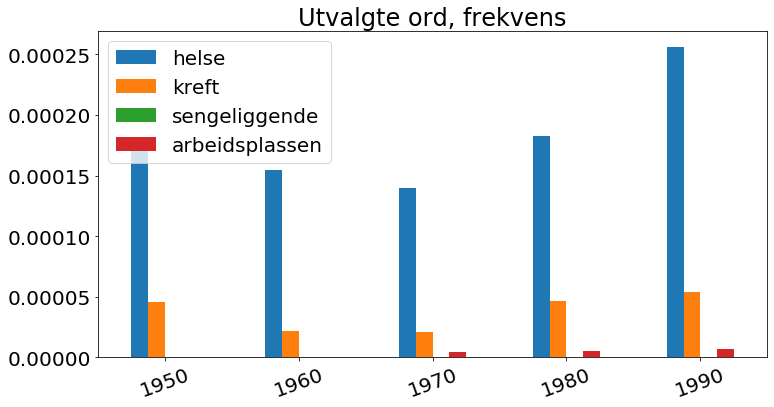

In [56]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, frekvens', df=agg);

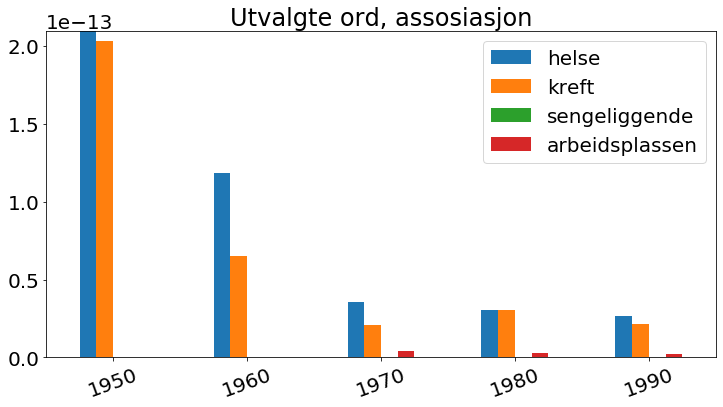

In [57]:
barchart(['helse','kreft',"sengeliggende", 'arbeidsplassen'], 'Utvalgte ord, assosiasjon');

<br>
<br>

# Sjekk ut vanlige ord

Bare for å se at de har lave verdier og er stabile gjennom kollokasjonen

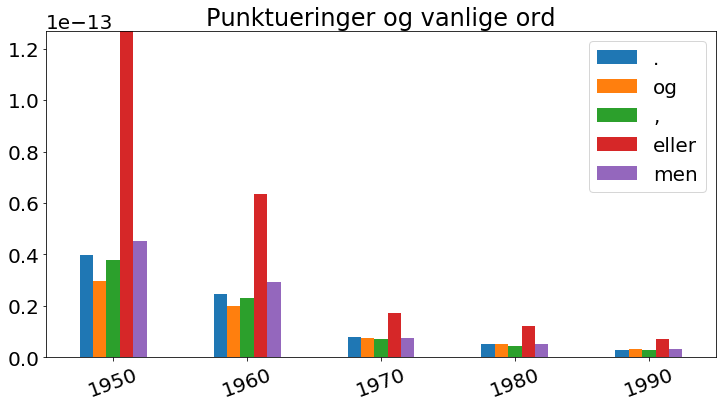

In [58]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', pmi);

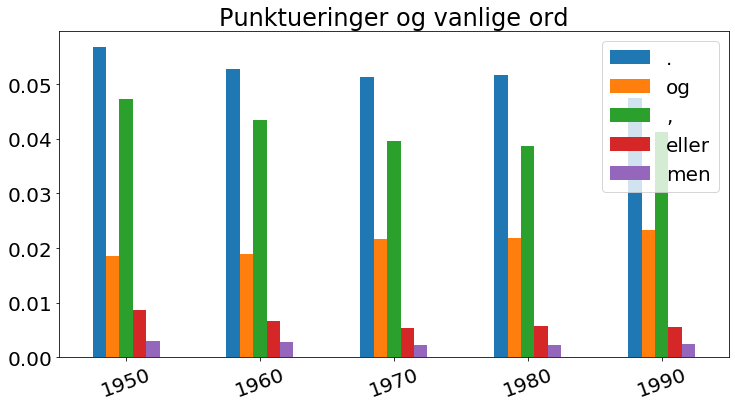

In [59]:
barchart(['.','og', ',','eller', 'men'], 'Punktueringer og vanlige ord', agg);

<br>
<br>

# De fremste blandt topoi 

Merk at på grunn av louvain-algoritmen kan topoiene endre seg litt fra kjøring til kjøring

In [60]:
commchart = lambda x, part =(1,6): barchart(comm[list(comm.keys())[x]][part[0]:part[1]], list(comm.keys())[x]);

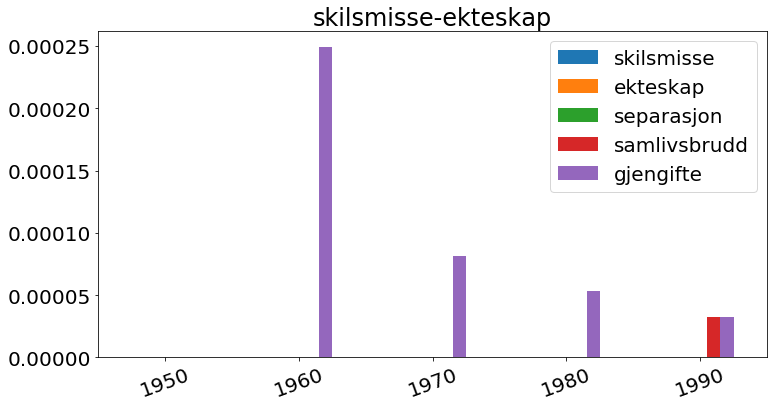

In [61]:
commchart(2, (0,5));

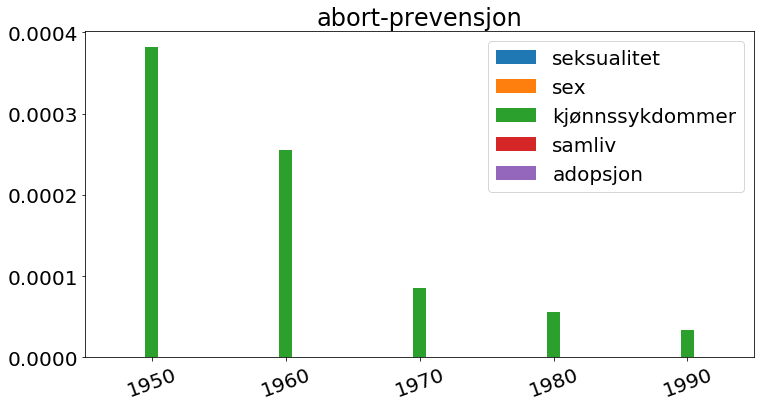

In [62]:
commchart(1, (3, 8))

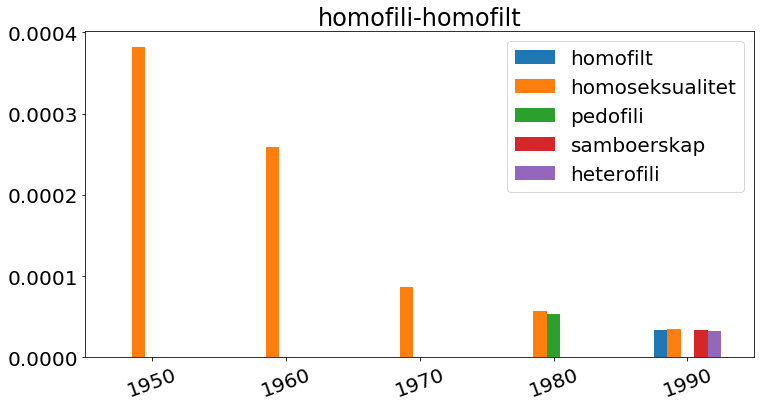

In [63]:
commchart(3)